# Task 6.5 Unsupervised Machine Learning: kmeans clustering

## Script Table of Contents  

1. Import libraries and data sets  
2. Clean and preprocess the data frame for analysis
3. Employ elbow technique and select the number of clusters
4. Run the k-means algorithm and add results as a new column in the data frame  
5. Create scatterplot visualizations to view the results  
6. Calculate descriptive statistics for the clusters  
7. Propose next steps based on the clustering analysis

# 1. Import libraries and data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Ensures plots are displayed in the notebook
%matplotlib inline

In [3]:
path = r'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/6_Advanced Analytics & Dashboard Design/Achievement Project/'

In [4]:
# Import the data sets
df = pd.read_csv(os.path.join(path, '2_Data', 'Prepared Data', 'HUD_gun_analysis.csv'))

In [5]:
df.head()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults ≤ high school dip,avg unemploy rate 2015_2020,Area housing assistance category,Gun incident category
0,1001,1,0,40,11.5,4.250000,Few properties,Few gun incidents
1,1003,12,7,86,9.2,4.533333,Few properties,Few gun incidents
2,1005,3,1,21,26.8,6.533333,Few properties,Few gun incidents
3,1007,1,1,8,20.9,5.233333,Few properties,Few gun incidents
4,1009,2,0,21,19.5,4.216667,Few properties,Few gun incidents


In [6]:
df.shape

(2344, 8)

# 2. Clean and preprocess the data frame for analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FIPS Code                         2344 non-null   int64  
 1   assisted_housing_count            2344 non-null   int64  
 2   active_finance                    2344 non-null   int64  
 3   gun incident count                2344 non-null   int64  
 4   % of adults ≤ high school dip     2344 non-null   float64
 5   avg unemploy rate 2015_2020       2344 non-null   float64
 6   Area housing assistance category  2344 non-null   object 
 7   Gun incident category             2344 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 146.6+ KB


In [8]:
# Remove categorical data
df.drop(columns=df.columns[6:], inplace = True)

In [9]:
# Rename column ''% of adults ≤ high school dip'
df.rename(columns={'% of adults ≤ high school dip': '% of adults < high school dip'}, inplace=True)

In [10]:
df.head()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults < high school dip,avg unemploy rate 2015_2020
0,1001,1,0,40,11.5,4.250000
1,1003,12,7,86,9.2,4.533333
2,1005,3,1,21,26.8,6.533333
3,1007,1,1,8,20.9,5.233333
4,1009,2,0,21,19.5,4.216667


# 3. Employ elbow technique and select the number of clusters

In [11]:
# Define the range of potential clusters
num_cl = range(1, 10)

# Define k-means clusters in the assigned range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
# Create a cluster variation score for each cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [13]:
score

[-538701096084.5134,
 -138996333087.84775,
 -71521073953.41951,
 -36185775239.56947,
 -19703714934.41191,
 -14432484997.23407,
 -9230893869.262451,
 -7291151263.298496,
 -5733437283.839415]

<function matplotlib.pyplot.show(close=None, block=None)>

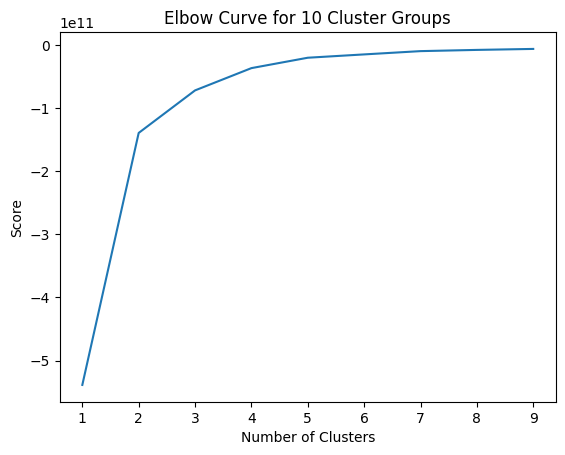

In [14]:
# Using PyLab, plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve for 10 Cluster Groups')
pl.show

__I interpret from the elbow curve that 3 clusters is the most efficient number for this analysis__

# 4. Run the k-means algorithm and add results as a new column in the data frame

In [15]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [16]:
# Fit the k-means object to the data set
kmeans.fit(df)

KMeans(n_clusters=3)

In [17]:
# Create a column of the k-means results and add it to the dataframe
df['clusters'] = kmeans.fit_predict(df)

In [18]:
# Check the revised dataframe
df.head()

,FIPS Code,assisted_housing_count,active_finance,gun incident count,% of adults < high school dip,avg unemploy rate 2015_2020,clusters
0,1001,1,0,40,11.5,4.250000,0
1,1003,12,7,86,9.2,4.533333,0
2,1005,3,1,21,26.8,6.533333,0
3,1007,1,1,8,20.9,5.233333,0
4,1009,2,0,21,19.5,4.216667,0


In [19]:
# Count the number of data points per cluster
df['clusters'].value_counts()

clusters
1    1014
2     921
0     409
Name: count, dtype: int64

# 5. Create scatterplot visualizations to view the results

## 5.1 'assisted housing count' and 'gun incident count' variables

<function matplotlib.pyplot.show(close=None, block=None)>

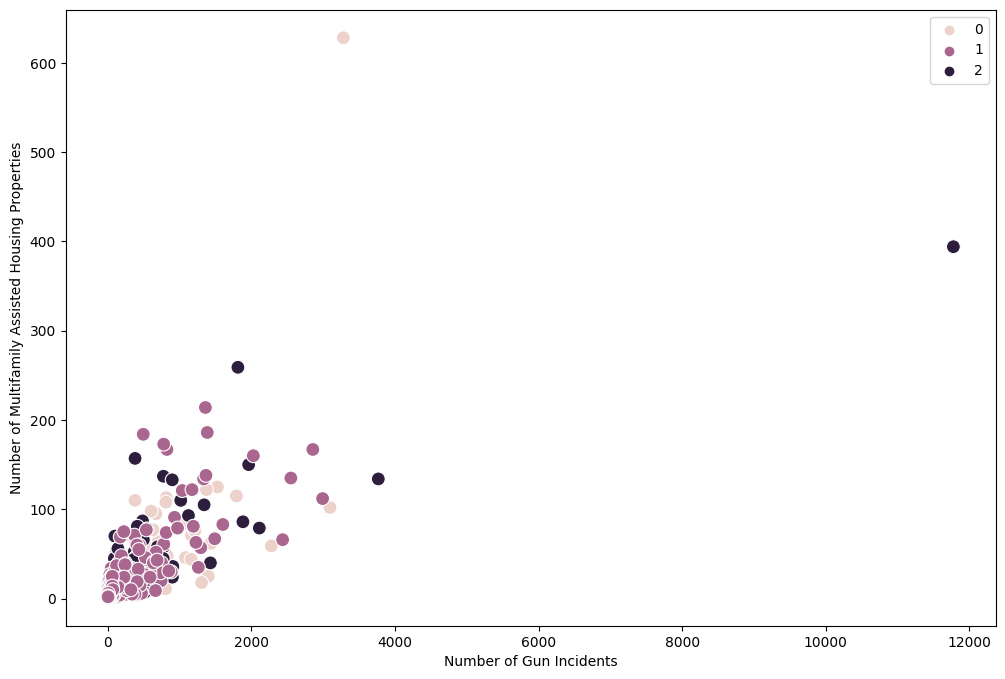

In [20]:
# Plot the clusters for the 'assisted_housing_count' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Historic Multifamily Assisted Housing Properties')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

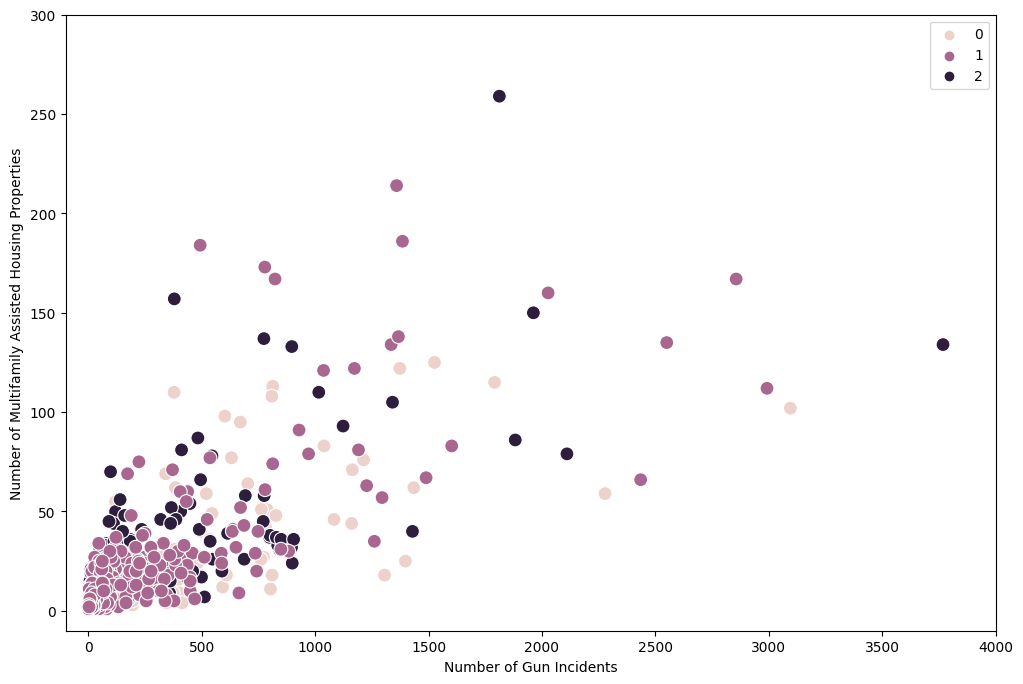

In [21]:
# Repeat the same plot, but limiting the x-axis to values <4000 and the y-axis to values <300
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Historic Multifamily Assisted Housing Properties')
plt.xlim(-100,4000)
plt.ylim(-10,300)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

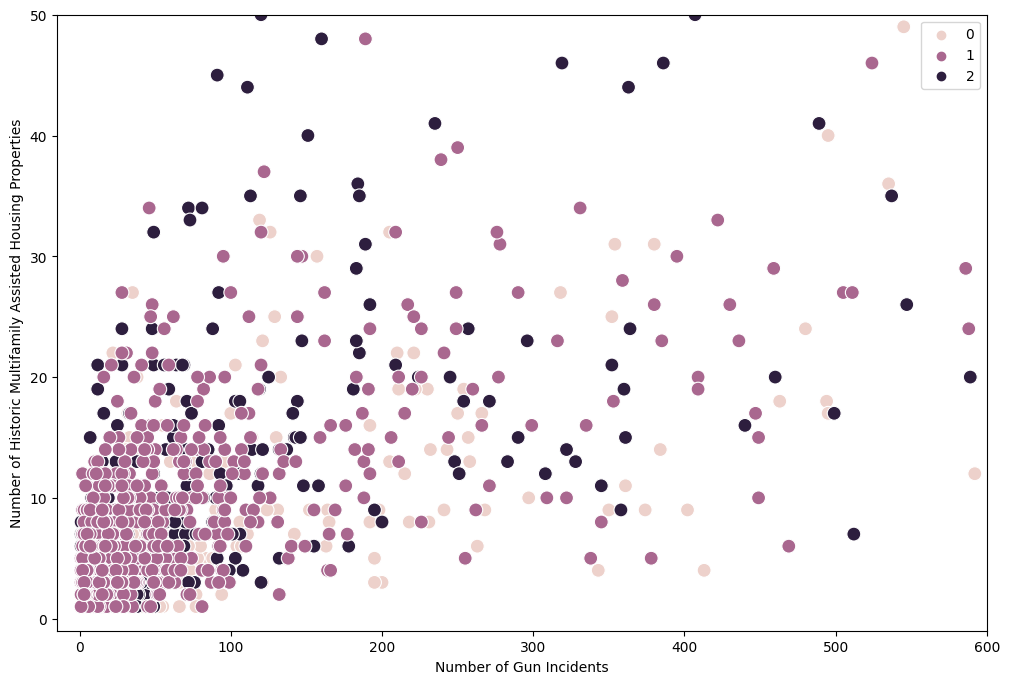

In [33]:
# Repeat the same plot, but limiting the x-axis to values <1000 and the y-axis to values <100
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Historic Multifamily Assisted Housing Properties')
plt.xlim(-15,600)
plt.ylim(-1,50)
plt.show

__I believe a more agressive treatment of extreme values with the data set is needed to have a more useful output from a cluster analysis using the k-means technique.  This third visualization starts to show some pattern in the three clusters with the pink cluster having higher incidents of gun violence with fewer assisted housing properties and the dark purple cluster with a higher density of assisted housing but not as high proportional levels of gun violence.  The purple cluster is tightly packed with most areas with less than 20 assisted housing properties and gun incidents below 150 that increases in line with areas that have more assisted housing properties.__. 

__This does start to provide three clusters of counties that could be investigated for other factors taht might contribute to rates of gun violence.__

## 5.2 'active_finance' and 'gun incident count'

<function matplotlib.pyplot.show(close=None, block=None)>

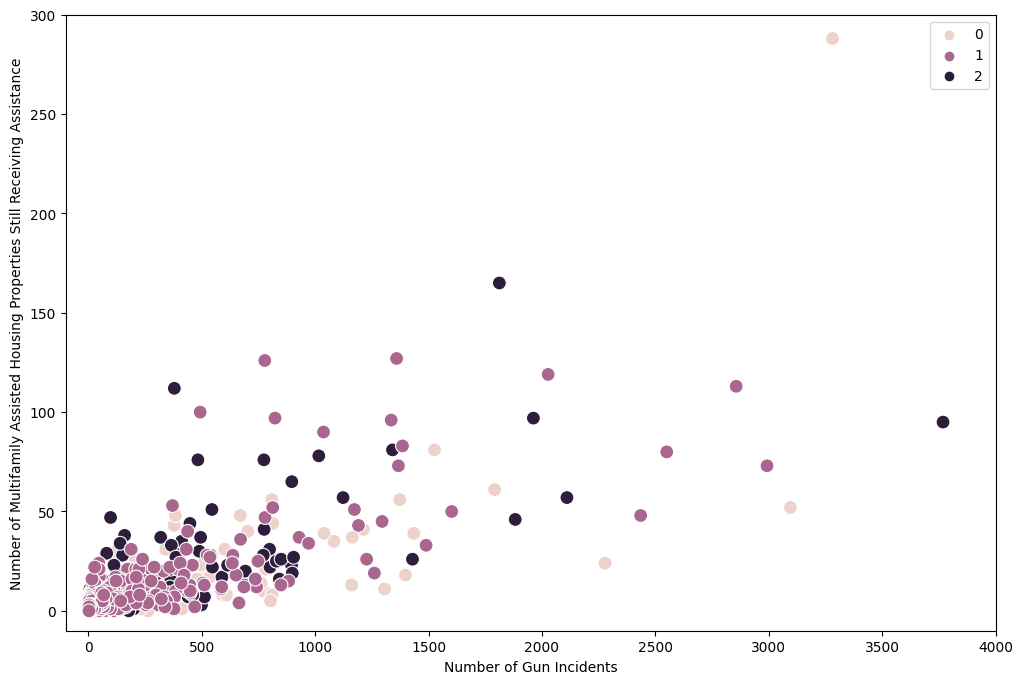

In [30]:
# Plot the clusters for 'active_finace' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['active_finance'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Multifamily Assisted Housing Properties Still Receiving Assistance')
plt.xlim(-100,4000)
plt.ylim(-10,300)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

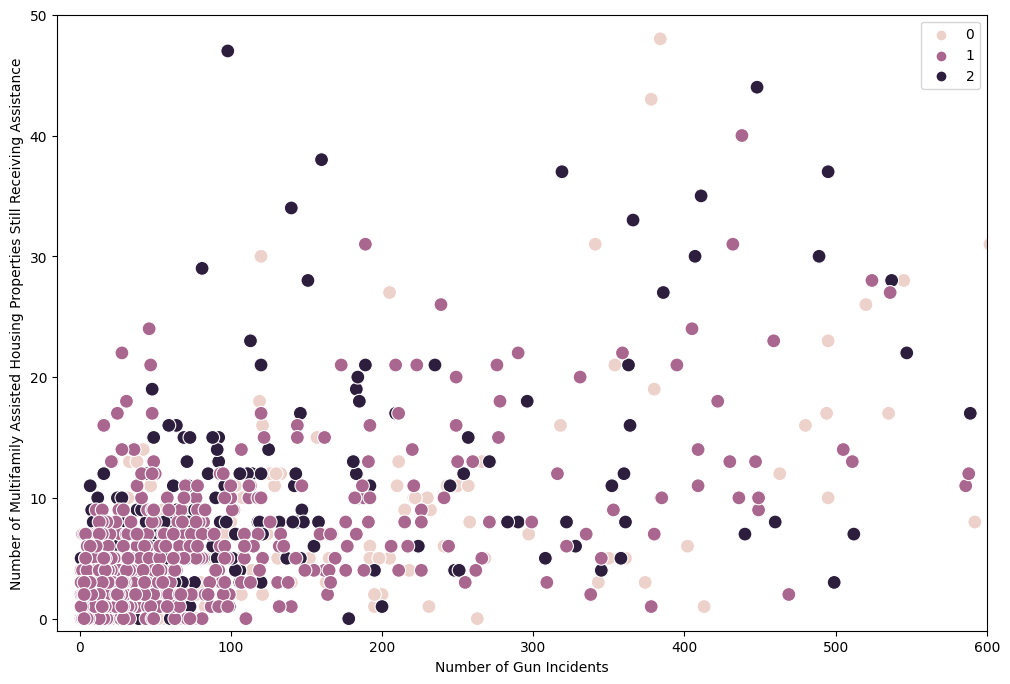

In [34]:
# Plot the clusters for 'active_finace' and 'gun incident count' variables with further limits on outliers
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['active_finance'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Number of Multifamily Assisted Housing Properties Still Receiving Assistance')
plt.xlim(-15,600)
plt.ylim(-1,50)
plt.show

## 5.3 '% of adults without a high school diploma' and 'gun incident count' variables

<function matplotlib.pyplot.show(close=None, block=None)>

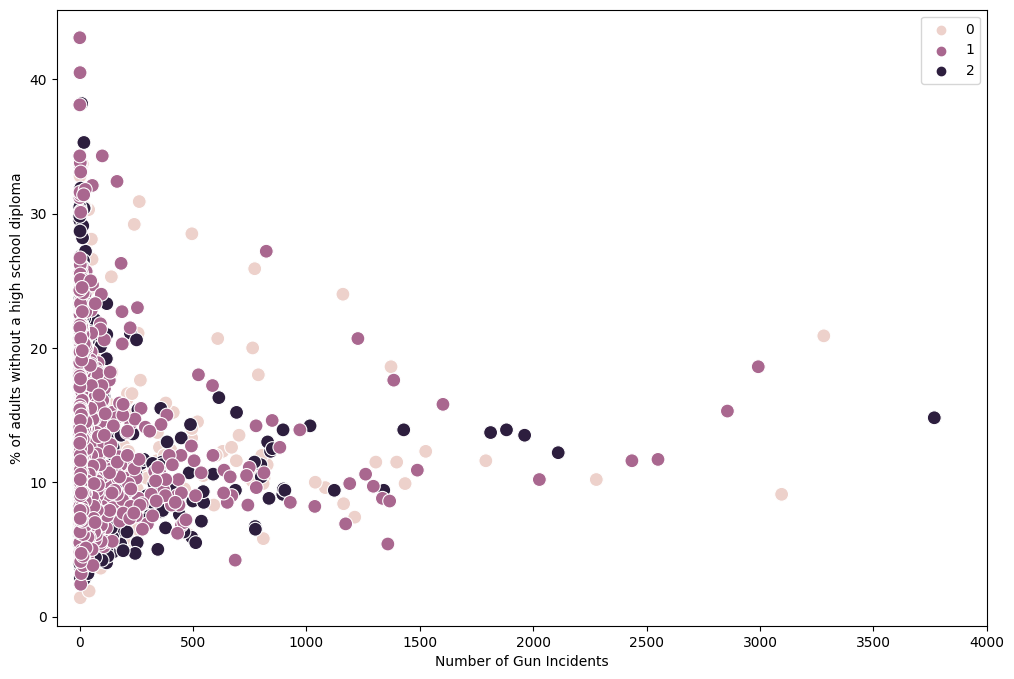

In [36]:
# Plot the clusters for the '% of adults < high school dip' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['% of adults < high school dip'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('% of adults without a high school diploma')
plt.xlim(-100,4000)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

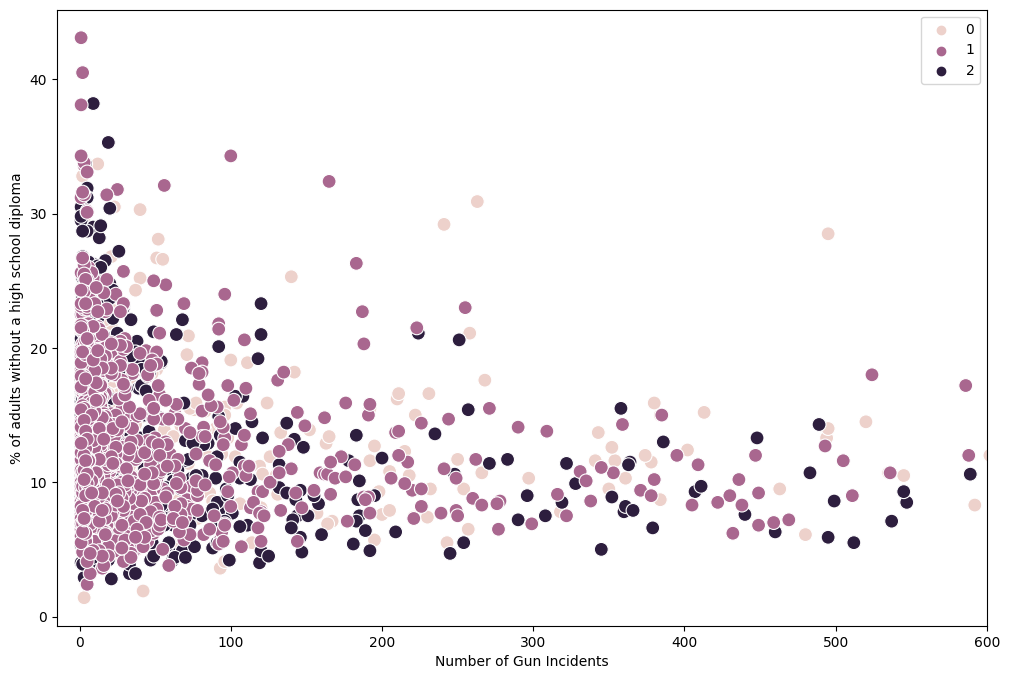

In [37]:
# Plot the clusters for the '% of adults < high school dip' and 'gun incident count' (with additional extreme value removal) variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['% of adults < high school dip'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('% of adults without a high school diploma')
plt.xlim(-15,600)
plt.show

__Again, with stricter treatment of outliers, some trends between the three cluster emerge - if still weak. The pink cluster has areas with a higher percentages of adults without high school diplomans and lower incidents of gun violence than areas in the dark purple cluster that have higher incidents of gun violence with lower percentages of adults without high school diplomas overall - both with notable extreme values still present.__

## 5.4 'average unemployment rate 2015-2020' and 'gun incident count' variables

<function matplotlib.pyplot.show(close=None, block=None)>

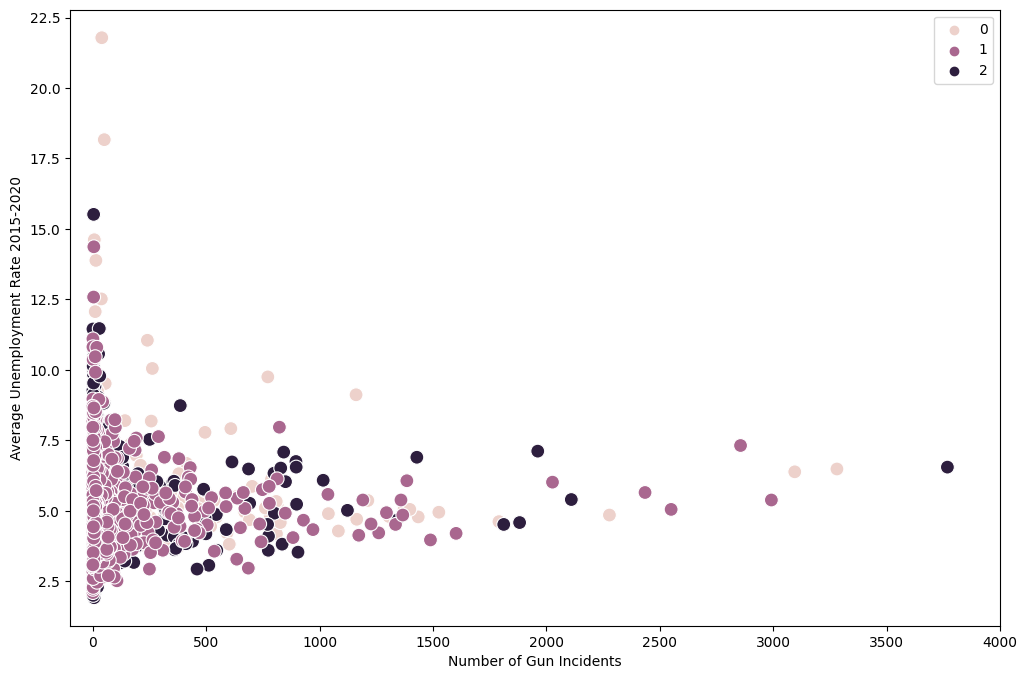

In [29]:
# Plot the clusters for the 'avg unemploy rate 2015_2020' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['avg unemploy rate 2015_2020'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Average Unemployment Rate 2015-2020')
plt.xlim(-100,4000)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

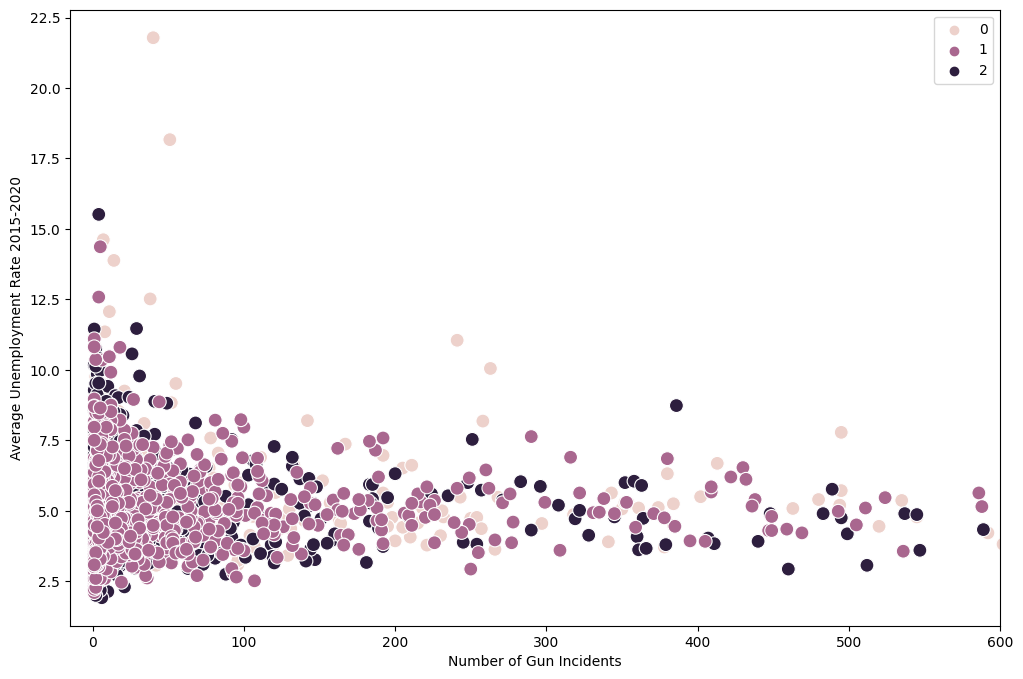

In [38]:
# Plot the clusters for the 'avg unemploy rate 2015_2020' and 'gun incident count' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['gun incident count'], y = df['avg unemploy rate 2015_2020'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of Gun Incidents')
plt.ylabel('Average Unemployment Rate 2015-2020')
plt.xlim(-15,600)
plt.show

__This cluster comparison does not provide much insight.__

## 5.5 Housing assistance, historical and active, and unemployment

<function matplotlib.pyplot.show(close=None, block=None)>

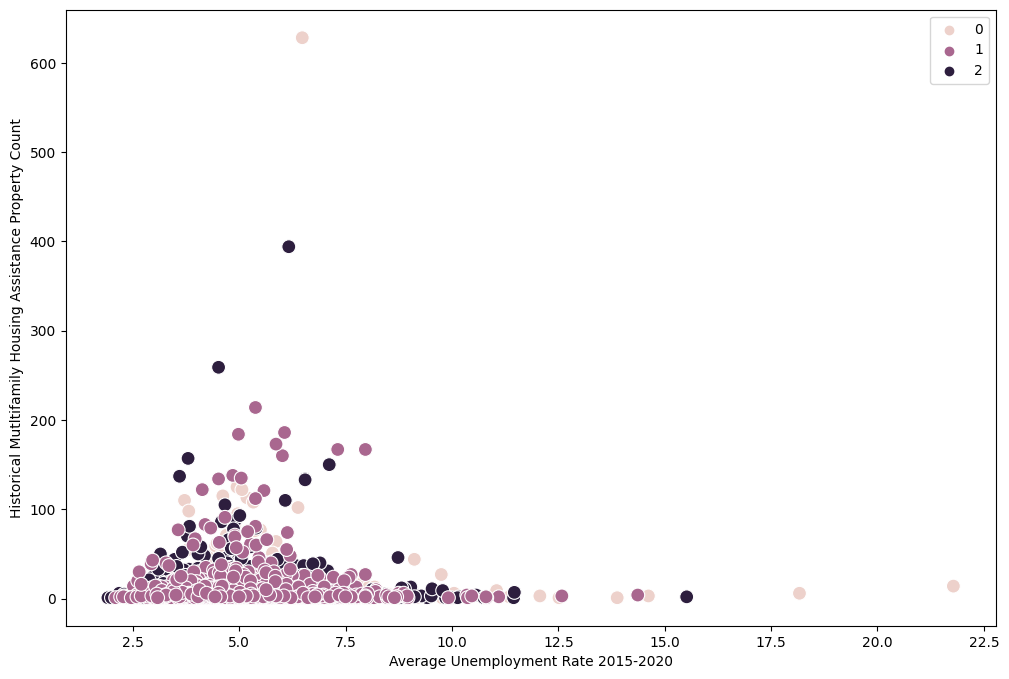

In [52]:
# Plot the clusters for the 'housing assistance count' and 'avg unemploy rate 2015_2020' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['avg unemploy rate 2015_2020'], y = df['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Historical Mutltifamily Housing Assistance Property Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

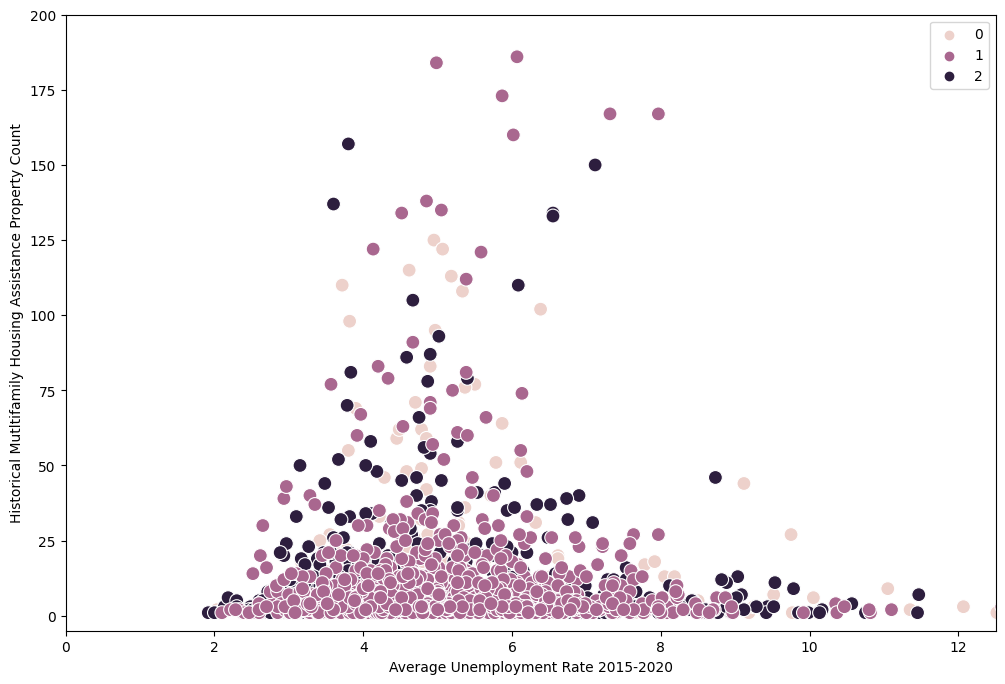

In [51]:
# Plot the clusters for the 'housing assistance count' and 'avg unemploy rate 2015_2020' variables with extreme values cut-off
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['avg unemploy rate 2015_2020'], y = df['assisted_housing_count'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Historical Mutltifamily Housing Assistance Property Count')
plt.ylim(-5,200)
plt.xlim(0, 12.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

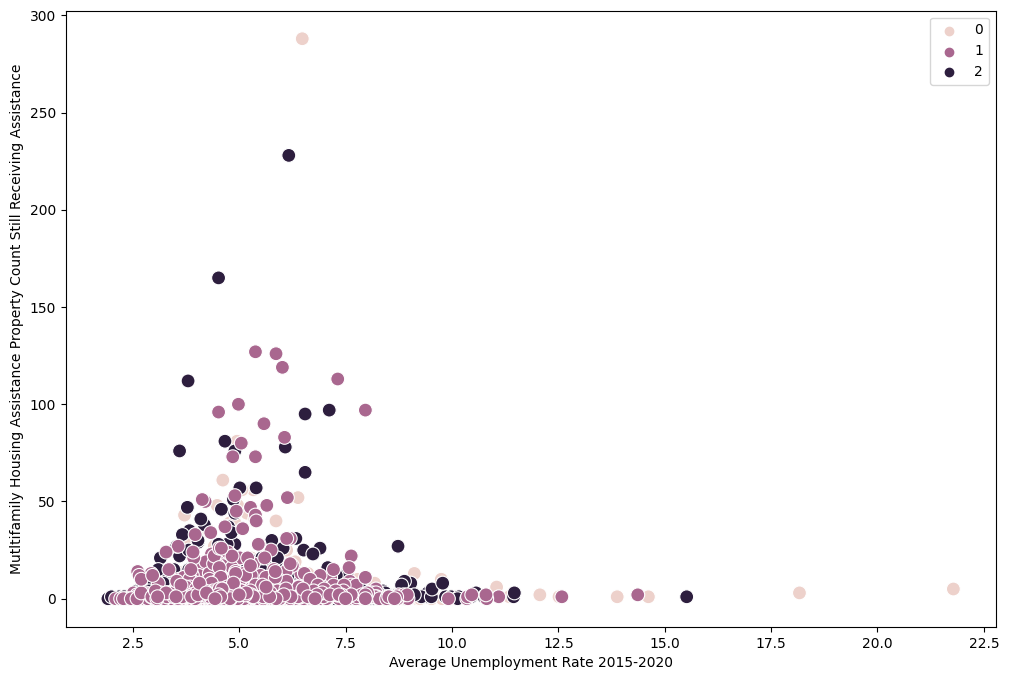

In [50]:
# Plot the clusters for the 'active_fianance' and 'avg unemploy rate 2015_2020' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['avg unemploy rate 2015_2020'], y = df['active_finance'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Mutltifamily Housing Assistance Property Count Still Receiving Assistance')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

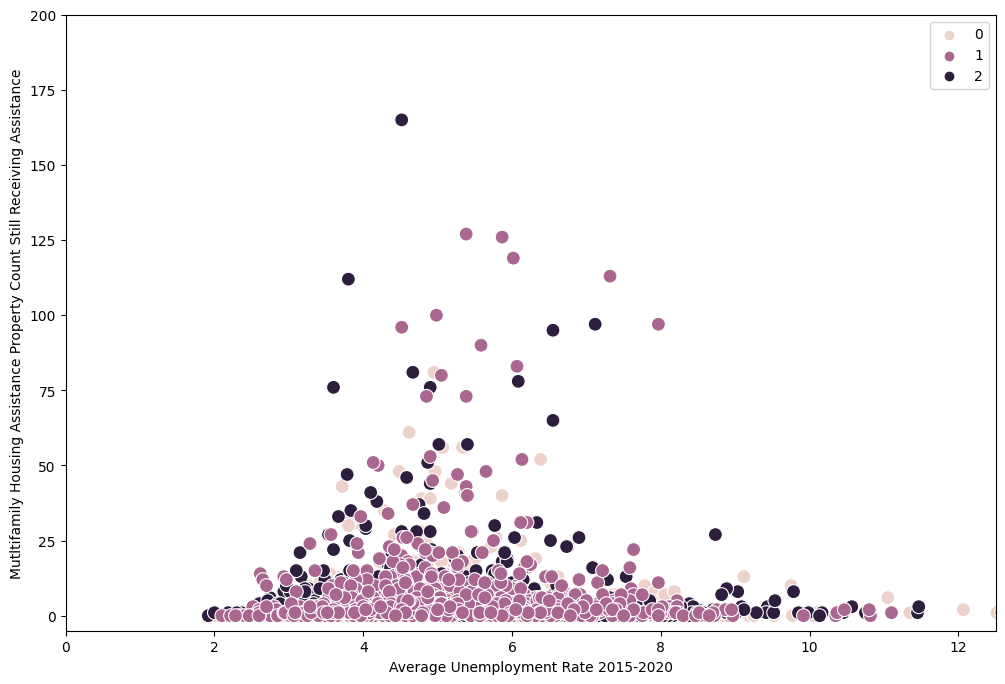

In [49]:
# Plot the clusters for the 'active_fianance' and 'avg unemploy rate 2015_2020' variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['avg unemploy rate 2015_2020'], y = df['active_finance'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Average Unemployment Rate 2015-2020')
plt.ylabel('Mutltifamily Housing Assistance Property Count Still Receiving Assistance')
plt.ylim(-5,200)
plt.xlim(0, 12.5)
plt.show

# 6. Calculate descriptive statistics for the clusters

In [25]:
# Create labels for the three clusters
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'

In [27]:
# Calculate summary statistics for the data set variables grouping by cluster label
df.groupby('cluster').agg({'FIPS Code': ['mean', 'median'], 'assisted_housing_count': ['mean', 'median'], 'active_finance': ['mean', 'median'], 'gun incident count': ['mean', 'median'], '% of adults < high school dip': ['mean', 'median'], 'avg unemploy rate 2015_2020': ['mean', 'median']})

FIPS Code          assisted_housing_count          
                     mean   median                   mean median   
cluster                                                            
dark purple  23722.785016  22125.0               8.676439    3.0  \
pink          7913.078240   8015.0              12.545232    4.0   
purple       45108.865878  46084.0               9.844181    4.0   

            active_finance        gun incident count          
                      mean median               mean median   
cluster                                                       
dark purple       4.887079    1.0          81.727470    9.0  \
pink              6.640587    2.0         149.440098   25.0   
purple            5.246548    2.0          87.397436   15.0   

            % of adults < high school dip        avg unemploy rate 2015_2020   
                                     mean median                        mean   
cluster                                                                        
dark purple                     11.910532   10.5                    5.010894  \
pink                            14.679218   14.3                    5.467848   
purple                          13.022781   12.0                    5.174770   

                       
               median  
cluster                
dark purple  4.766667  
pink         5.083333  
purple       5.000000

# 7. Propose next steps based on the clustering analysis

__The first step is to go back to the data set preparation and a closer look of statistical analysis for extreme value identification and a more efficient treatment to see if clearer trends are visible from cluster analysis using k-means.__  

__Secondly, using the results of the cluster analysis discussed above, I would propose using the clusters identified to see if the clusters can be labeled by looking at characteristics of the counties under each - paying particular attention to the pink and dark purple clusters - to see if other factors such as urban mega city/ urban smaller city, type of industry (manufacturing, farming, etc.), location (coastal vs inland), etc are commom within the clusters for further investigation.__  

__One area I would be intersted to explore more is the impact of active housing assistance on areas vs those that have properties that did receive housing assistance but don't any longer and the impacts on gun violence, education, and unemployment to see if there are significant trends or insights.__

__Other factors around multifamily housing assistance can be explored to look at the corrleation with gun crimes, which could provide interesting insights.__